In [ ]:
import re
import string
import pandas as pd

import csv
import json
import glob

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import plotly.express as px


In [ ]:
with open('/content/drive/MyDrive/Diploma_paper/out_nerel_inference_new.txt') as f:
  text = f.read()

Let us make a list of predictions

In [ ]:
text_list = text.split('*=*=*=*=*=*=*=*=*=*=')

Let us remove empty predictions (but not false empty predictions)

In [ ]:
text_list_ent = []
for i in text_list:
  # if (re.findall('\nModel true: \[]', i) == []) and (re.findall('\nModel predict: \[]', i) == []) or (re.findall('\nModel true: \[]', i) != []) and (re.findall('\nModel predict: \[]', i) == []) or (re.findall('\nModel true: \[]', i) == []) and (re.findall('\nModel predict: \[]', i) != []):
    text_list_ent.append(i)


Number of sentences 

In [ ]:
len(text_list)//29

1126

Create list of entity names

In [ ]:
entities = {"PERSON": "Найди в тексте обозначение человека, человеческого существа, имени или фамилии",
"PROFESSION": "Найти в тексте обозначение рода трудовой деятельности человека, обозначение труда или занятия, за которое человек получает оплату",
"ORGANIZATION": "Найди в тексте обозначение производственного образования, сформированного из людей, деятельность которых координируется руководством для достижения общей цели",
"EVENT": "Найди в тексте обозначение значимого явления, которое произошло в некоторый момент времени",
"DATE": "Найди в тексте временную запись, включающую в себя число месяца, месяц или год",
"COUNTRY": "Найди в тексте обозначение территории, имеющей политические, географические, культурные и исторические границы",
"CITY": "Найди в тексте обозначение крупного населенного пункта, административного, торгового, промышленного и культурного центра",
"NUMBER": "Найди в тексте обозначение количества или обозначение математической величины, при помощи которой производится счет",
"AGE": "Найди в тексте обозначение возраста или обозначение количества лет",
"ORDINAL": "Найди в тексте обозначение порядкового номера",
"AWARD": "Найди в тексте обозначение приза, получаемого победителем соревнования, или обозначение награды за успехи",
"STATE_OR_PROVINCE": "Найди в тексте обозначение территориальной административной единицы в пределах государства или страны",
"NATIONALITY": "Найди в тексте обозначение принадлежности индивида к национальной или этнической группе, народности, нации, обозначение гражданства или юридической принадлежности к тому или иному государству",
"FACILITY": "Найди в тексте обозначение коммерческого или административного здания",
"LAW": "Найди в тексте обозначение правила или нормативно-правового акта, который принимается законодательным органом государственной власти и регулирует определённые общественные отношения",
"WORK_OF_ART": "Найди в тексте обозначение произведения художественного творчества или иного материального продукта деятельности человека, имеющего определенную ценность",
"CRIME": "Найди в тексте обозначение правонарушения или общественно опасного деяния, совершение которого влечёт применение мер уголовной ответственности",
"DISEASE": "Найди в тексте обозначение расстройства здоровья, нарушающего деятельность организма или его отдельных органов",
"LOCATION": "Найди в тексте обозначение места или местоположения какого-либо объекта или предмета", 
"IDEOLOGY": "Найди в тексте обозначение системы взглядов и идей, характеризующих какую-либо социальную группу, класс, политическую партию или сообщество",
"PRODUCT": "Найди в тексте обозначение какого-либо предмета или результата человеческого труда, например, обработки, переработки, исследования",
"PENALTY": "Найди в тексте обозначение меры воздействия на того, кто совершил правонарушение или преступление",
"TIME": "Найди в тексте обозначение продолжительности, длительности чего-либо, измеряемого секундами, минутами, часами",
"MONEY": "Найди в тексте обозначение меры стоимости товаров или услуг, используемой для обмена",
"DISTRICT": "Найди в тексте обозначение административно-территориальной единицы или обозначение части города и страны",
"RELIGION": "Найди в тексте обозначение системы взглядов, обусловленной верой в сверхъестественное, включающей в себя свод моральных норм и обрядов, и объединяющей людей в институты",
"PERCENT": "Найди в тексте обозначение одной сотой части чего-либо, используемой для обозначения доли чего-либо по отношению к целому",
"LANGUAGE": "Найди в тексте обозначение сложной знаковой системы, естественно или искусственно созданной для коммуникации между людьми",
"FAMILY": "Найди в тексте обозначение основанной на браке или кровном родстве малой группы людей, члены которой связаны общностью быта, взаимной ответственностью и взаимопомощью"
 }

In [ ]:
entity_names = entities.keys()

Let us count how many entities of each type were found (number of predictions)

In [ ]:
text_list_count = []
for i in text_list:
  # if (re.findall('\nModel predict: \[]', i) == []):
    text_list_count.append(i)

In [ ]:
entity_count = {}
for i in entity_names:
  entity_count[i] = 0

for i in text_list_count:
  for j in entity_names:
    if re.findall(j, i) != []:
      entity_count[j] += 1


In [ ]:

print(sorted(entity_count.items(), key =
             lambda kv:(kv[1], kv[0])))   

[('PERCENT', 7), ('LANGUAGE', 8), ('FAMILY', 14), ('PENALTY', 15), ('RELIGION', 17), ('DISTRICT', 28), ('LAW', 33), ('MONEY', 34), ('CRIME', 41), ('TIME', 41), ('IDEOLOGY', 43), ('DISEASE', 46), ('LOCATION', 54), ('FACILITY', 57), ('PRODUCT', 59), ('NATIONALITY', 64), ('WORK_OF_ART', 64), ('AWARD', 66), ('ORDINAL', 98), ('STATE_OR_PROVINCE', 106), ('AGE', 137), ('NUMBER', 168), ('CITY', 240), ('COUNTRY', 322), ('ORGANIZATION', 440), ('DATE', 446), ('PROFESSION', 457), ('EVENT', 473), ('PERSON', 601)]


In [ ]:
sum(entity_count.values())

4179

Create a plot

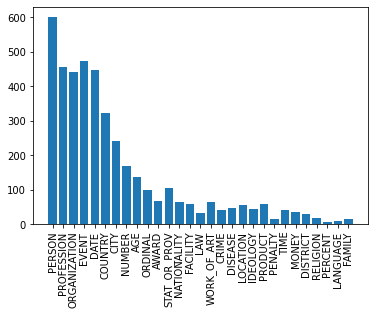

In [ ]:
import matplotlib.pyplot as plt

names = list(entity_count.keys())
names[11] = 'STAT_OR_PROV'
values = list(entity_count.values())

plt.bar(range(len(entity_count)), values, tick_label=names)
plt.xticks(range(len(entity_count)), names, rotation='vertical')
plt.show()

We can see, that top 5 entities found are: Person, Profession, Organization, Event, Date

Let us look more close. We will create a dictionary of Pandas dataframes for every entity type.
Each datafrane contains following information:
Context, True (correct answer), Predict (prediction of model)

In [ ]:
entity_dict = {}
for i in entity_names:
  entity_dict[i] = []
  
for i in text_list_ent:
  for j in entity_names:
    if re.findall(j, i) != []:
      entity_dict[j].append(i)

In [ ]:
for elem in entities.keys():
  for i, el in enumerate(entity_dict[elem]):
   entity_dict[elem][i] = el[(len(entities[elem])+14):]

In [ ]:
# for i, el in enumerate(entity_dict['FAMILY']):
#   print(entity_dict['FAMILY'][i])


In [ ]:
replace = []
for elem in entity_dict.keys():
  for i, el in enumerate(entity_dict[elem]):
    replace = re.findall('%%.*?\n', el)
    new_str = el
    for j in replace:
        new_str = new_str.replace(j,'')
    entity_dict[elem][i] = new_str



In [ ]:
for el in entity_dict:
  for idx, elem in enumerate(entity_dict[el]):
    entity_dict[el][idx] = elem.split('\n')[:-1]
  # for j in i.split('\n'):
  #   print('-',j)

In [ ]:
import ast
import pandas as pd
pd.set_option('display.max_rows', 100)
res = {}
for key in entity_dict:
  df = pd.DataFrame(columns=['context', 'true', 'predict'])
  for el in entity_dict[key]:
    el[1] = el[1].replace('Model true: ','')
    el[2] = el[2].replace('Model predict: ','')

    el[1] = ast.literal_eval(el[1])
    el[2] = ast.literal_eval(el[2])
    df = df.append({'context':el[0], 'true': el[1], 'predict':el[2]}, ignore_index=True)
  res[key] = df


In [ ]:
# res['LAW'].iloc[30]['predict']
res['PERSON']

,context,true,predict
0,замминистра здравоохранения великобритании за...,"[(25, 29, надин доррис, PERSON), (36, 40, нади...","[(25, 29, надин доррис, PERSON), (36, 40, нади..."
1,с тех пор доррис провела встречи с сотнями лю...,"[(18, 20, доррис, PERSON), (33, 38, борис джон...","[(18, 20, доррис, PERSON), (33, 38, борис джон..."
2,буерак выпустил альбом репост модерн буерак 5...,[],"[(15, 18, буерак, PERSON), (20, 26, репост мод..."
3,"« буерак » - россииская постпанк группа, осно...","[(35, 39, александром макеевым, PERSON), (43, ...","[(35, 39, александром макеевым, PERSON), (43, ..."
4,умер эдуард лимонов эдуард лимонов во вторник...,"[(16, 21, эдуард лимонов, PERSON), (21, 26, эд...","[(16, 21, эдуард лимонов, PERSON), (21, 26, эд..."
...,...,...,...
596,в декабре 2011 года президентом италии джордж...,"[(22, 28, джорджо наполитано, PERSON)]","[(22, 28, джорджо наполитано, PERSON)]"
597,секретом своего долголетия эмма считала употр...,"[(18, 20, эмма, PERSON)]","[(18, 20, эмма, PERSON)]"
598,морано заверила :,"[(15, 17, морано, PERSON)]","[(15, 17, морано, PERSON)]"
599,"празднование образования кнр, 2009 год в кита...","[(48, 52, карла маркса, PERSON), (53, 59, фрид...","[(48, 52, карла маркса, PERSON), (53, 59, фрид..."


Let us make a plot of dependency between length (number of words) of entity and similarity with true answer

In [ ]:
new_result_dict = res


In [ ]:
import numpy as np
for key in new_result_dict:
  new_result_dict[key]['len'] = np.empty((len(new_result_dict[key]), 0)).tolist()
  new_result_dict[key]['similarity'] = np.empty((len(new_result_dict[key]), 0)).tolist()
  # new_result_dict[key] = new_result_dict[key].drop('len + similarity', axis = 1)

In [ ]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()


for key in new_result_dict:
  for i in range(len(new_result_dict[key])):
    for elem in new_result_dict[key].iloc[i]['predict']:
      if new_result_dict[key].iloc[i]['true'] != []:
        if 1<=len(elem[2].split())<= 3:
          new_result_dict[key].iloc[i]['len'].append('1-3')
          new_result_dict[key].iloc[i]['similarity'].append(SequenceMatcher(None, new_result_dict[key].iloc[i]['true'][0][2], elem[2]).ratio())

        if 4<=len(elem[2].split())<=7:
          new_result_dict[key].iloc[i]['len'].append('4-7')
          new_result_dict[key].iloc[i]['similarity'].append(SequenceMatcher(None, new_result_dict[key].iloc[i]['true'][0][2], elem[2]).ratio())

        if 7<len(elem[2].split())<=10:
          new_result_dict[key].iloc[i]['len'].append('8-10')
          new_result_dict[key].iloc[i]['similarity'].append(SequenceMatcher(None, new_result_dict[key].iloc[i]['true'][0][2], elem[2]).ratio())

        if 10<len(elem[2].split()):
          new_result_dict[key].iloc[i]['len'].append('over 10')
          new_result_dict[key].iloc[i]['similarity'].append(SequenceMatcher(None, new_result_dict[key].iloc[i]['true'][0][2], elem[2]).ratio())


In [ ]:

PERsim_1_3 = []
PERsim_4_7 = []
PERsim_8_10 = []
PERsim_over_10 = []

ORGsim_1_3 = []
ORGsim_4_7 = []
ORGsim_8_10 = []
ORGsim_over_10 = []

CONsim_1_3 = []
CONsim_4_7 = []
CONsim_8_10 = []
CONsim_over_10 = []

PROFsim_1_3 = []
PROFsim_4_7 = []
PROFsim_8_10 = []
PROFsim_over_10 = []

DATsim_1_3 = []
DATsim_4_7 = []
DATsim_8_10 = []
DATsim_over_10 = []

# for key in new_result_dict:
for i in range(len(new_result_dict['PERSON'])):
  if new_result_dict['PERSON'].iloc[i]['len'] != []:
    for j, elem in enumerate(new_result_dict['PERSON'].iloc[i]['len']):
        if elem == '1-3':
          PERsim_1_3.append(new_result_dict['PERSON'].iloc[i]['similarity'][j])

        if elem == '4-7':
          PERsim_4_7.append(new_result_dict['PERSON'].iloc[i]['similarity'][j])

        if elem == '8-10':
          PERsim_8_10.append(new_result_dict['PERSON'].iloc[i]['similarity'][j])

        if elem == 'over 10':
          PERsim_over_10.append(new_result_dict['PERSON'].iloc[i]['similarity'][j])


for i in range(len(new_result_dict['ORGANIZATION'])):
  if new_result_dict['ORGANIZATION'].iloc[i]['len'] != []:
    for j, elem in enumerate(new_result_dict['ORGANIZATION'].iloc[i]['len']):
        if elem == '1-3':
          ORGsim_1_3.append(new_result_dict['ORGANIZATION'].iloc[i]['similarity'][j])

        if elem == '4-7':
          ORGsim_4_7.append(new_result_dict['ORGANIZATION'].iloc[i]['similarity'][j])

        if elem == '8-10':
          ORGsim_8_10.append(new_result_dict['ORGANIZATION'].iloc[i]['similarity'][j])

        if elem == 'over 10':
          ORGsim_over_10.append(new_result_dict['ORGANIZATION'].iloc[i]['similarity'][j])



In [ ]:
for i in range(len(new_result_dict['PROFESSION'])):
  if new_result_dict['PROFESSION'].iloc[i]['len'] != []:
    for j, elem in enumerate(new_result_dict['PROFESSION'].iloc[i]['len']):
        if elem == '1-3':
          PROFsim_1_3.append(new_result_dict['PROFESSION'].iloc[i]['similarity'][j])

        if elem == '4-7':
          PROFsim_4_7.append(new_result_dict['PROFESSION'].iloc[i]['similarity'][j])

        if elem == '8-10':
          PROFsim_8_10.append(new_result_dict['PROFESSION'].iloc[i]['similarity'][j])

        if elem == 'over 10':
          PROFsim_over_10.append(new_result_dict['PROFESSION'].iloc[i]['similarity'][j])


for i in range(len(new_result_dict['DATE'])):
  if new_result_dict['DATE'].iloc[i]['len'] != []:
    for j, elem in enumerate(new_result_dict['DATE'].iloc[i]['len']):
        if elem == '1-3':
          DATsim_1_3.append(new_result_dict['DATE'].iloc[i]['similarity'][j])

        if elem == '4-7':
          DATsim_4_7.append(new_result_dict['DATE'].iloc[i]['similarity'][j])

        if elem == '8-10':
          DATsim_8_10.append(new_result_dict['DATE'].iloc[i]['similarity'][j])

        if elem == 'over 10':
          DATsim_over_10.append(new_result_dict['DATE'].iloc[i]['similarity'][j])


for i in range(len(new_result_dict['COUNTRY'])):
  if new_result_dict['COUNTRY'].iloc[i]['len'] != []:
    for j, elem in enumerate(new_result_dict['COUNTRY'].iloc[i]['len']):
        if elem == '1-3':
          CONsim_1_3.append(new_result_dict['COUNTRY'].iloc[i]['similarity'][j])

        if elem == '4-7':
          CONsim_4_7.append(new_result_dict['COUNTRY'].iloc[i]['similarity'][j])

        if elem == '8-10':
          CONsim_8_10.append(new_result_dict['COUNTRY'].iloc[i]['similarity'][j])

        if elem == 'over 10':
          CONsim_over_10.append(new_result_dict['COUNTRY'].iloc[i]['similarity'][j])


In [ ]:
PER1_3 = sum(PERsim_1_3)/len(PERsim_1_3)
PER4_7 = sum(PERsim_4_7)/len(PERsim_4_7)
PER8_10 =sum(PERsim_8_10)/len(PERsim_8_10)
PER_OVER_10 = sum(PERsim_over_10)/len(PERsim_over_10)


In [ ]:
PROF1_3 = sum(PROFsim_1_3)/len(PROFsim_1_3)
PROF4_7 = sum(PROFsim_4_7)/len(PROFsim_4_7)
PROF8_10 = sum(PROFsim_8_10)/len(PROFsim_8_10)
PROF_OVER_10 = sum(PROFsim_over_10)/len(PROFsim_over_10)


In [ ]:
CON1_3 = sum(CONsim_1_3)/len(CONsim_1_3)
CON4_7 = sum(CONsim_4_7)/len(CONsim_4_7)
CON8_10 = sum(CONsim_8_10)/len(CONsim_8_10)
CON_OVER_10 = sum(CONsim_over_10)/len(CONsim_over_10)

In [ ]:
ORG1_3 = sum(ORGsim_1_3)/len(ORGsim_1_3)
ORG4_7 = sum(ORGsim_4_7)/len(ORGsim_4_7)
ORG8_10 = sum(ORGsim_8_10)/len(ORGsim_8_10)
ORG_OVER_10 = sum(ORGsim_over_10)/len(ORGsim_over_10)

In [ ]:
DAT1_3 = sum(DATsim_1_3)/len(DATsim_1_3)
DAT4_7 = sum(DATsim_4_7)/len(DATsim_4_7)
DAT8_10 = sum(DATsim_8_10)/len(DATsim_8_10)
DAT_OVER_10 = sum(DATsim_over_10)/len(DATsim_over_10)

In [ ]:


list1 = [PER1_3, PER4_7, PER8_10, PER_OVER_10]
list2 = [ORG1_3, ORG4_7, ORG8_10, ORG_OVER_10]
list3 = [PROF1_3, PROF4_7, PROF8_10, PROF_OVER_10]
list4 = [CON1_3, CON4_7, CON8_10, CON_OVER_10]
list5 = [DAT1_3, DAT4_7, DAT8_10, DAT_OVER_10]

df = pd.DataFrame(list(zip(list1, list2, list3, list4, list5)), index = ['1-3 words', '4-7 words', '8-10 words', 'over 10 words'],
               columns =['PERSON', 'ORGANIZATION', 'PROFESSION', 'COUNTRY', 'DATE'])


In [ ]:
df

,PERSON,ORGANIZATION,PROFESSION,COUNTRY,DATE
1-3 words,0.750323,0.728198,0.728984,0.836740,0.876888
4-7 words,0.535306,0.643321,0.471019,0.246422,0.862550
8-10 words,0.285091,0.411083,0.283519,0.320000,0.418004
over 10 words,0.197762,0.236901,0.181433,0.146093,0.304404


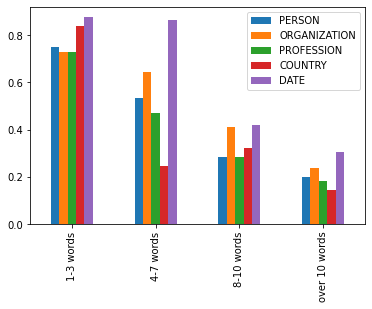

In [ ]:
df.plot.bar()